In [1]:
import os
import sys
import pickle
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from tqdm import tqdm
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
import pandas as pd
import string
from pathlib import Path
import string
import torch

In [2]:
# Relative imports from: https://stackoverflow.com/a/57790804
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.CONFIG import PICKLE_DIR, RESULTS_DIR, FORMATTED_DIR
from src.utils.utils import map_nans, get_string

Below, ```RADIUS``` refers to the assumed radius of fovea and ```FILTER``` to the fact that data without outliers is used.

In [4]:
RADIUS = 48
FILTER = True

In [5]:
save_path = os.path.join(module_path, RESULTS_DIR, "figs", f"{RADIUS}", f"filter={FILTER}")
os.makedirs(save_path, exist_ok=True)

# Retrieve samples

Retrieve the samples that were obtained using Stan for each model, and saved as Pickle-files.

## Separate model

In [6]:
model_name = "separate"

file_names = {'posterior' : f"posterior_{model_name}.pickle",
                    'fit' : f"fit_{model_name}.pickle"}

dir = os.path.join(module_path, PICKLE_DIR, f"{RADIUS}", f"{model_name}", f"filter={FILTER}")

path = os.path.join(dir, file_names["posterior"])
pickle_in = open(path,"rb")
posterior_s = pickle.load(pickle_in)

path = os.path.join(dir, file_names["fit"])
pickle_in = open(path,"rb")
fit_s = pickle.load(pickle_in)

## Separate model with covariates

In [7]:

model_name = "separate_covariate"

file_names = {'posterior' : f"posterior_{model_name}.pickle",
                    'fit' : f"fit_{model_name}.pickle"}

dir = os.path.join(module_path, PICKLE_DIR, f"{RADIUS}", f"{model_name}", f"filter={FILTER}")

path = os.path.join(dir, file_names["posterior"])
pickle_in = open(path,"rb")
posterior_sc = pickle.load(pickle_in)

path = os.path.join(dir, file_names["fit"])
pickle_in = open(path,"rb")
fit_sc = pickle.load(pickle_in)


# Posterior plots

Plot the posteriors for each fitted parameter. $\hat{R}$ values are also checked here.

In [8]:
func_dict = {
            "mean":np.mean,
            "std": np.std,
            "5%": lambda x: np.percentile(x, 5),
            "median": lambda x: np.percentile(x, 50),
            "95%": lambda x: np.percentile(x, 95),
}

## Separate model

array([<AxesSubplot:title={'center':'alpha\n0'}>,
       <AxesSubplot:title={'center':'alpha\n1'}>,
       <AxesSubplot:title={'center':'sigma\n0'}>,
       <AxesSubplot:title={'center':'sigma\n1'}>], dtype=object)

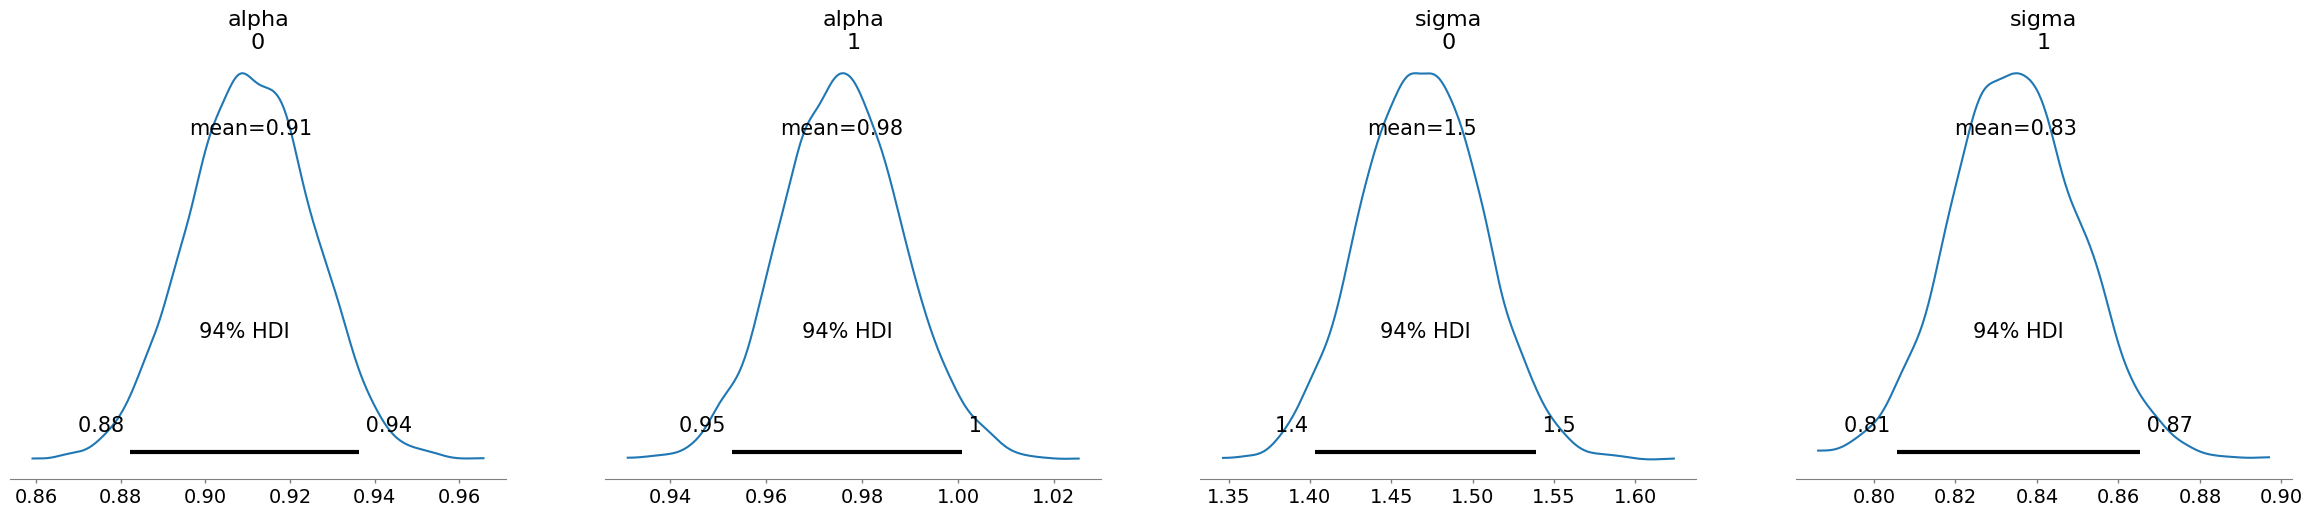

In [9]:
az.plot_posterior(fit_s, var_names = ["alpha", "sigma"])

In [10]:
az.rhat(fit_s, var_names=['alpha', 'sigma'], method="rank")

<xarray.Dataset>
Dimensions:      (alpha_dim_0: 2, sigma_dim_0: 2)
Coordinates:
  * alpha_dim_0  (alpha_dim_0) int64 0 1
  * sigma_dim_0  (sigma_dim_0) int64 0 1
Data variables:
    alpha        (alpha_dim_0) float64 1.001 1.001
    sigma        (sigma_dim_0) float64 1.002 1.001

In [11]:
az.summary(fit_s, stat_funcs=func_dict, extend=False)

,mean,std,5%,median,95%
alpha[0],0.911,0.015,0.887,0.910,0.934
alpha[1],0.976,0.013,0.955,0.976,0.997
sigma[0],1.469,0.037,1.408,1.469,1.529
sigma[1],0.835,0.016,0.809,0.834,0.861
y_rep[0],0.854,0.866,0.047,0.588,2.610
...,...,...,...,...,...
y_rep[5375],1.526,1.658,0.055,0.969,4.893
y_rep[5376],1.538,1.691,0.052,0.977,4.879
y_rep[5377],1.567,1.740,0.062,1.017,4.884
mean_gt,0.440,0.496,0.000,0.000,1.000


In [12]:
df_s = az.summary(fit_s, stat_funcs=func_dict, extend=False, var_names=['alpha', 'sigma'])

In [13]:
df_s

,mean,std,5%,median,95%
alpha[0],0.911,0.015,0.887,0.910,0.934
alpha[1],0.976,0.013,0.955,0.976,0.997
sigma[0],1.469,0.037,1.408,1.469,1.529
sigma[1],0.835,0.016,0.809,0.834,0.861


In [14]:
filepath = os.path.join(save_path, "fitting_results_separate.csv")  
df_s.to_csv(filepath)

## Separate model with covariates

array([[<AxesSubplot:title={'center':'alpha\n0'}>,
        <AxesSubplot:title={'center':'alpha\n1'}>,
        <AxesSubplot:title={'center':'beta_0\n0'}>,
        <AxesSubplot:title={'center':'beta_0\n1'}>],
       [<AxesSubplot:title={'center':'beta_i\n0'}>,
        <AxesSubplot:title={'center':'beta_i\n1'}>,
        <AxesSubplot:title={'center':'beta_d\n0'}>,
        <AxesSubplot:title={'center':'beta_d\n1'}>]], dtype=object)

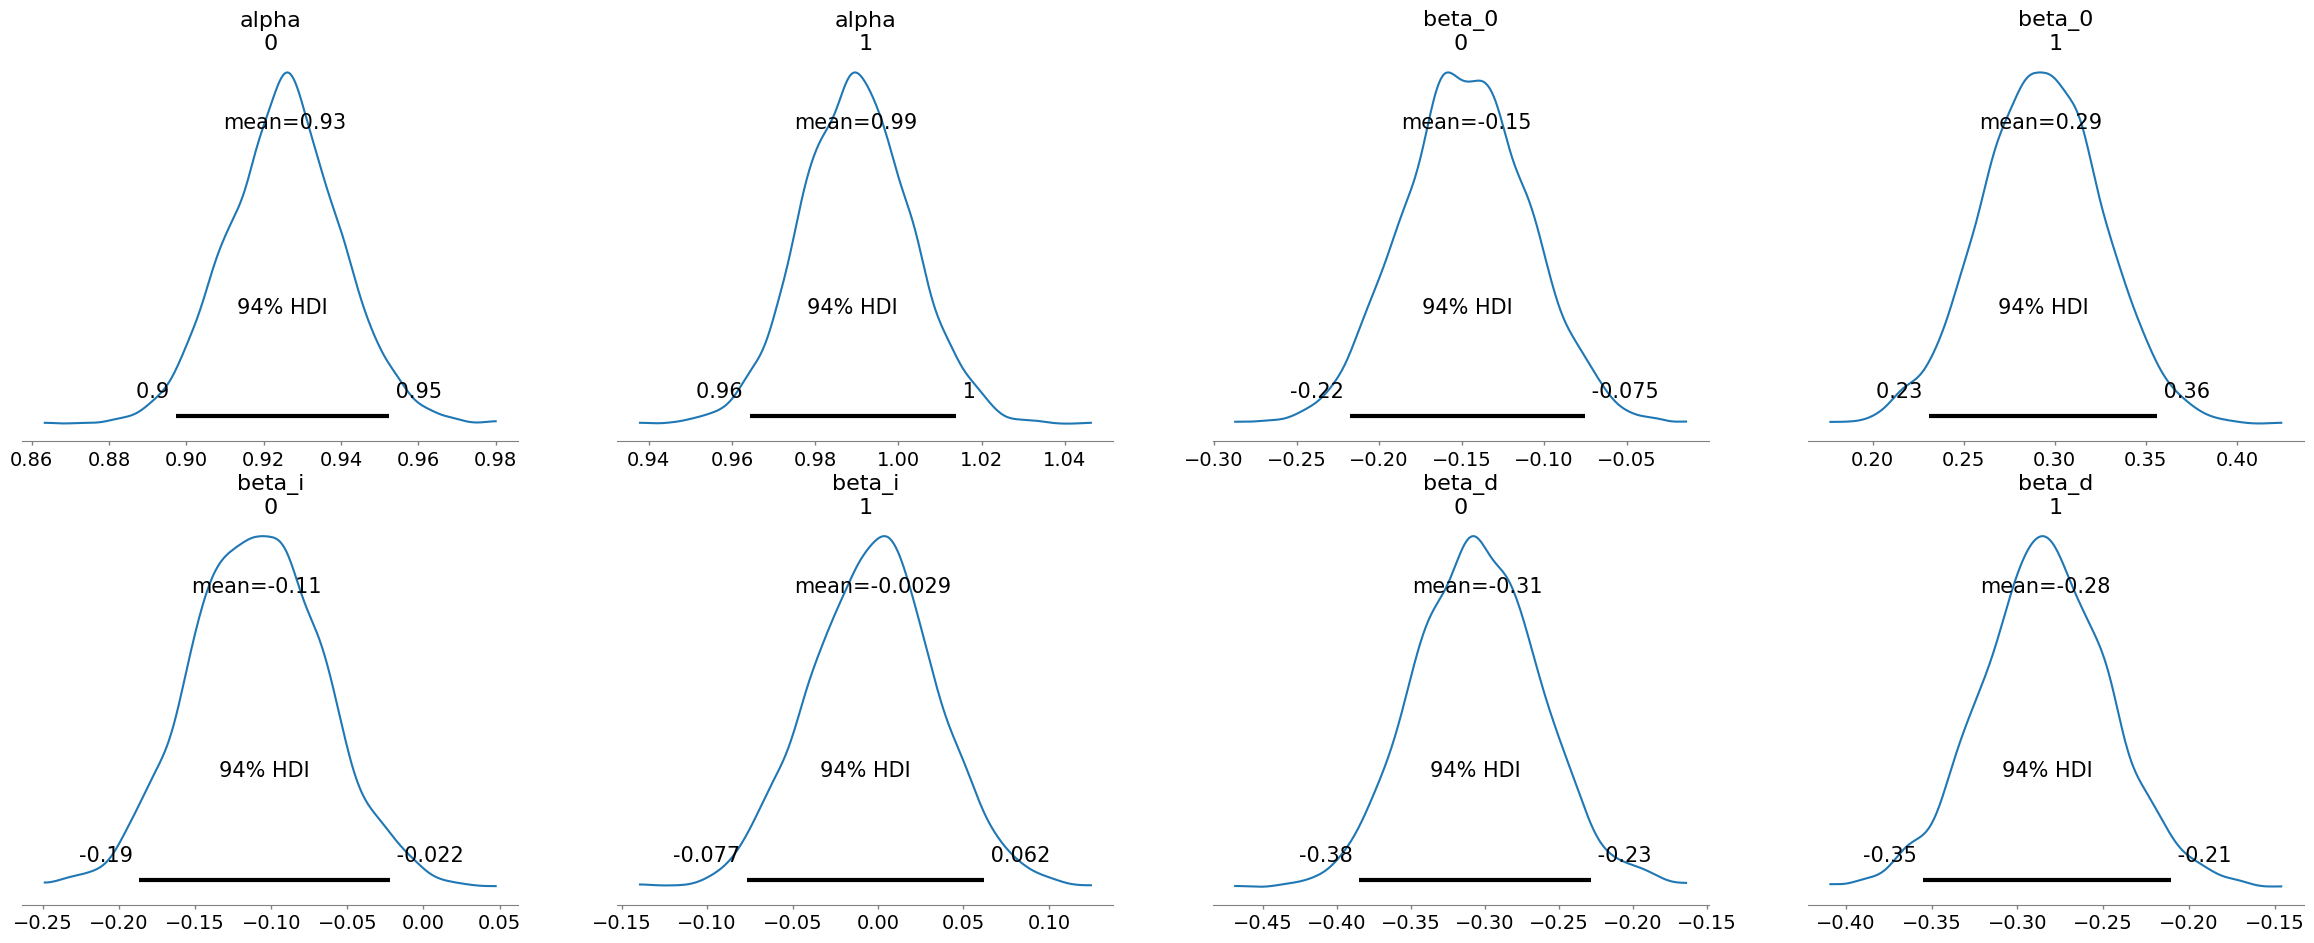

In [15]:
az.plot_posterior(fit_sc, var_names = ["alpha", "beta_0", "beta_i", "beta_d"])

In [16]:
az.rhat(fit_sc, var_names=['alpha', 'beta_0', 'beta_d', 'beta_i'], method="rank")

<xarray.Dataset>
Dimensions:       (alpha_dim_0: 2, beta_0_dim_0: 2, beta_d_dim_0: 2, beta_i_dim_0: 2)
Coordinates:
  * alpha_dim_0   (alpha_dim_0) int64 0 1
  * beta_0_dim_0  (beta_0_dim_0) int64 0 1
  * beta_i_dim_0  (beta_i_dim_0) int64 0 1
  * beta_d_dim_0  (beta_d_dim_0) int64 0 1
Data variables:
    alpha         (alpha_dim_0) float64 1.002 1.002
    beta_0        (beta_0_dim_0) float64 0.9997 1.002
    beta_d        (beta_d_dim_0) float64 1.001 1.001
    beta_i        (beta_i_dim_0) float64 1.002 1.001

In [17]:
df_sc = az.summary(fit_sc, stat_funcs=func_dict, extend=False,var_names=['alpha', 'beta_0', 'beta_d', 'beta_i'])

In [18]:
df_sc

,mean,std,5%,median,95%
alpha[0],0.925,0.015,0.901,0.925,0.950
alpha[1],0.990,0.013,0.969,0.990,1.012
beta_0[0],-0.147,0.038,-0.210,-0.148,-0.084
beta_0[1],0.292,0.033,0.237,0.293,0.347
beta_d[0],-0.305,0.042,-0.374,-0.306,-0.236
beta_d[1],-0.284,0.038,-0.344,-0.284,-0.221
beta_i[0],-0.110,0.044,-0.181,-0.110,-0.037
beta_i[1],-0.003,0.037,-0.064,-0.002,0.058


In [19]:
filepath = os.path.join(save_path, "fitting_results_separatecovariate.csv")  
df_sc.to_csv(filepath)

## Scales

Since the scale parameter for the separate model with covariates is a linear combination of the covariates, it is difficult to interpret. Calculate values here.

### Separate model with covariates

In [20]:
df = fit_sc.to_frame()

for indicator in [1,2]:
    betas_0 = df[f'beta_0.{indicator}']
    betas_i = df[f'beta_i.{indicator}']
    betas_d = df[f'beta_d.{indicator}']
    alphas = df[f'alpha.{indicator}']
    
    sigmas_all = []
    
    for i,d in [(0,0), (1,0), (0,1), (1,1)]:
        
        sigmas = np.exp(-(betas_0 + betas_i*i + betas_d*d)/alphas)
        sigmas_all.append(sigmas.mean())
        
        print ("---------")
        print (f"CONDITION: {indicator}")
        print (f"i={i}, d={d}")
        print ("---------")
        print (f"mean scale: {round(sigmas.mean(),3)}")
        print (f"5% scale: {round(np.percentile(sigmas, 5),3)}")
        print (f"95% scale: {round(np.percentile(sigmas, 95),3)}")

---------
CONDITION: 1
i=0, d=0
---------
mean scale: 1.174
5% scale: 1.096
95% scale: 1.254
---------
CONDITION: 1
i=1, d=0
---------
mean scale: 1.321
5% scale: 1.239
95% scale: 1.41
---------
CONDITION: 1
i=0, d=1
---------
mean scale: 1.632
5% scale: 1.522
95% scale: 1.743
---------
CONDITION: 1
i=1, d=1
---------
mean scale: 1.837
5% scale: 1.718
95% scale: 1.963
---------
CONDITION: 2
i=0, d=0
---------
mean scale: 0.745
5% scale: 0.703
95% scale: 0.787
---------
CONDITION: 2
i=1, d=0
---------
mean scale: 0.747
5% scale: 0.714
95% scale: 0.78
---------
CONDITION: 2
i=0, d=1
---------
mean scale: 0.992
5% scale: 0.934
95% scale: 1.05
---------
CONDITION: 2
i=1, d=1
---------
mean scale: 0.995
5% scale: 0.939
95% scale: 1.052


# LOO-CV 

Assess the models with LOO-CV.

## Separate model

In [21]:
idata_s = az.from_pystan(posterior=fit_s, posterior_model=posterior_s)
loo_s = az.loo(idata_s, pointwise=True)

In [22]:
loo_s

Computed from 4000 posterior samples and 5378 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -5779.28    91.16
p_loo        4.53        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     5378  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

<AxesSubplot:xlabel='Data Point', ylabel='Shape parameter k'>

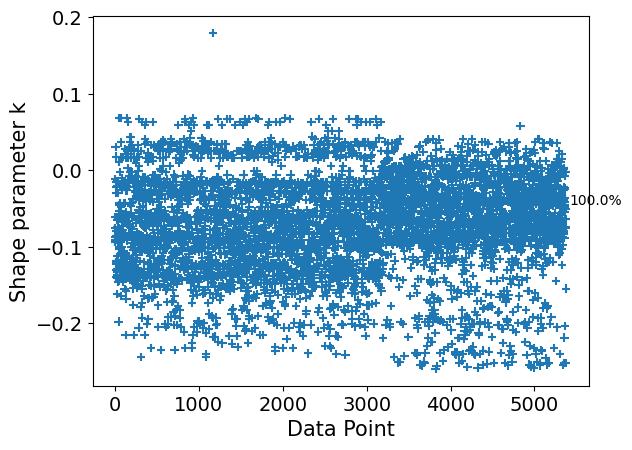

In [23]:
az.plot_khat(loo_s, show_bins=True)

## Separate model with covariates

In [24]:
idata_sc = az.from_pystan(posterior=fit_sc, posterior_model=posterior_sc)
loo_sc = az.loo(idata_sc, pointwise=True)

In [25]:
loo_sc

Computed from 4000 posterior samples and 5378 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -5725.77    89.55
p_loo        9.70        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     5378  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

<AxesSubplot:xlabel='Data Point', ylabel='Shape parameter k'>

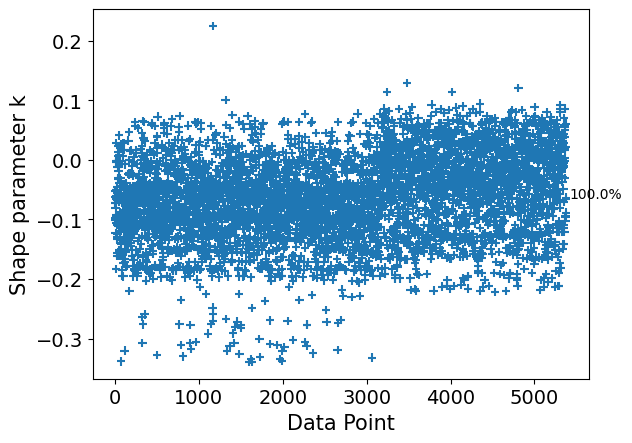

In [26]:
az.plot_khat(loo_sc, show_bins=True)

# Retrieve data from posteriors

Use Arviz to retrieve data from the posteriors for the separate model ```s``` and separate model with covariates ```sc```.

In [27]:
idata_s = az.from_pystan(posterior=fit_s, posterior_model=posterior_s, observed_data=["y"], posterior_predictive=["y_rep"])

In [28]:
idata_s

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [29]:
idata_sc = az.from_pystan(posterior=fit_sc, posterior_model=posterior_sc, observed_data=["y"], posterior_predictive=["y_rep"])

# Posterior predictive p-values

Use sampling from Stan to calculate the posterior predictive p-values.

## Using sampling from Stan

In [30]:
idata_s.posterior_predictive.y_rep.to_numpy().shape
n_data = len(idata_s.observed_data.y)

pval_idata_s = idata_s.posterior_predictive.y_rep.to_numpy().reshape([4000, n_data])
observed_idata_s = idata_s.observed_data.y

1.3124327083738552


0.0

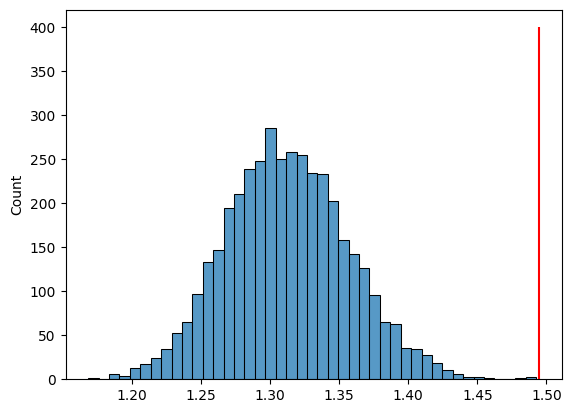

In [31]:
fig, ax = plt.subplots()
print(pval_idata_s.std(axis=1).mean())
sns.histplot(pval_idata_s.std(axis=1), ax=ax)
plt.vlines(x = observed_idata_s.std(), ymin=0, ymax=400, color="red")

np.sum(pval_idata_s.std(axis=1) >= observed_idata_s.to_numpy().std()) / len(pval_idata_s)

0.43975

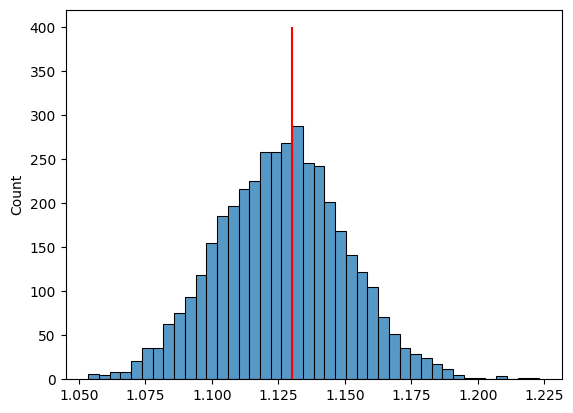

In [32]:
fig, ax = plt.subplots()

sns.histplot(idata_s.posterior_predictive.y_rep.to_numpy().reshape([4000, n_data]).mean(axis=1), ax=ax)
plt.vlines(x = idata_s.observed_data.y.mean(), ymin=0, ymax=400, color="red")

np.sum(pval_idata_s.mean(axis=1) >= observed_idata_s.to_numpy().mean()) / len(pval_idata_s)

In [33]:
idata_sc.posterior_predictive.y_rep.to_numpy().shape
n_data = len(idata_sc.observed_data.y)

pval_idata_sc = idata_sc.posterior_predictive.y_rep.to_numpy().reshape([4000, n_data])
observed_idata_sc = idata_sc.observed_data.y

1.3274922007807284

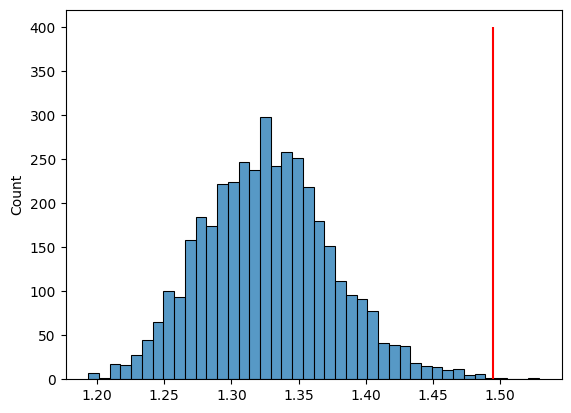

In [34]:
fig, ax = plt.subplots()

sns.histplot(idata_sc.posterior_predictive.y_rep.to_numpy().reshape([4000, n_data]).std(axis=1), ax=ax)
plt.vlines(x = idata_sc.observed_data.y.std(), ymin=0, ymax=400, color="red")

idata_sc.posterior_predictive.y_rep.to_numpy().reshape([4000, n_data]).std(axis=1).mean()

0.467

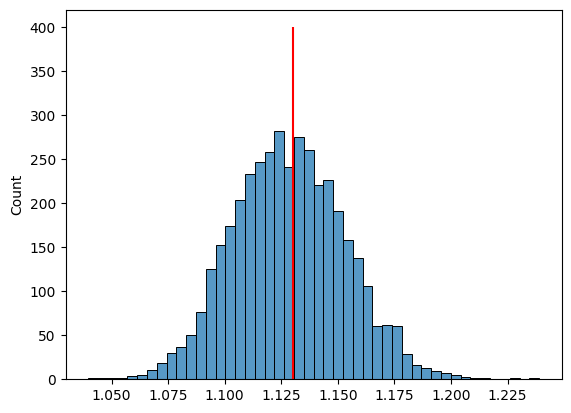

In [35]:
fig, ax = plt.subplots()

sns.histplot(idata_sc.posterior_predictive.y_rep.to_numpy().reshape([4000, n_data]).mean(axis=1), ax=ax)
plt.vlines(x = idata_sc.observed_data.y.mean(), ymin=0, ymax=400, color="red")
np.sum(pval_idata_sc.mean(axis=1) >= observed_idata_sc.to_numpy().mean()) / len(pval_idata_sc)

# Functions for plotting

Define some functions for plottin the results (Figures 3 and 4).

In [36]:
def plot_empirical(ax, subset):
    
    """
    Plot empirical
    """
    
    durations = np.linspace(0, 10, 200)
    proportion_surviving = []
    for duration in durations:
        subset_lessthan = subset.loc[subset.y > duration]
        proportion_surviving.append((len(subset_lessthan) / len(subset)))

    ax.scatter(durations, proportion_surviving, c = "black", zorder=20, s=0.5)

In [37]:
def plot_separate(ax, fit, n_sample, function, plot_title = True, sampling=True):
    
    
    X = torch.linspace(0, 20, 1000)
    c = {"Single-column" : "tab:orange", "Multi-column" : "tab:blue"}
    markers = {"Single-column" : "p", "Multi-column" : "x"}
    conditions = {1: "Single-column", 2: "Multi-column"}

    df = fit.to_frame()
    np.random.seed(233)
    
    if plot_title == True:
        ax.set_title("Both conditions", size = 14)
    ax.set_xlim(0,8)
    ax.set_xticks([0, 4, 8])

    for indicator in [1,2]:
        
        if sampling:
            alphas = df[f'alpha.{indicator}'].sample(n=n_sample, frac=None, replace=False, weights=None, random_state=None, axis=None).reset_index()

            sigmas = df[f'sigma.{indicator}'].sample(n=n_sample, frac=None, replace=False, weights=None, random_state=None, axis=None).reset_index()

            for index in tqdm(range(n_sample)):

                alpha = alphas[f'alpha.{indicator}'].to_numpy()[index]
                sigma = sigmas[f'sigma.{indicator}'].to_numpy()[index]

                sns.lineplot(x=X, y=function(alpha, sigma, X), color=c[conditions[indicator]], ax=ax, linewidth = 0.5, alpha=0.05, zorder = 10)

        else:
            alpha = df[f'alpha.{indicator}'].mean()
            sigma = df[f'sigma.{indicator}'].mean()
            X_MARKER = torch.linspace(0, 20, 20)
            sns.lineplot(x=X, y=function(alpha, sigma, X), color=c[conditions[indicator]], ax=ax, linewidth = 0.8, alpha=1, zorder = 10)
            ax.scatter(X_MARKER, function(alpha, sigma, X_MARKER), s=75, marker=markers[conditions[indicator]], color=c[conditions[indicator]])
            
    if function.__name__ == "survival_function":
        ax.set_ylabel('Pct. surviving', size = 16)
        ax.set_yticks([0, 0.5, 1])
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
        ax.set_ylim(0,1)
    elif function.__name__ == "hazard_function":
        ax.set_ylabel("Hazard rate", size = 16)
        ax.set_ylim(0,1.75)
        ax.set_yticks([0, 0.5, 1.0, 1.5, 1.75], fontsize=15)

In [38]:
def plot_separate_cov(axs, fit, n_sample, function, plot_all = False, plot_title=True,sampling=True):
    
    if function.__name__ == "survival_function":
        n_col = 1
        loc = "upper right"
        n_markers = 6
        offset = 1
    else:
        n_col = 4
        loc = "upper center"
        n_markers = 5
        offset = 1.2
    
    X = torch.linspace(0, 20, 1000)
    c = {"0,0": "#D81B60", "0,1": '#1E88E5', "1,0" : "#004D40", "1,1" : "sandybrown"}
    markers = {"0,0": "s", "0,1": '^', "1,0" : "D", "1,1" : "o"}
    labels = {"0,0": "t", "0,1": 'pt', "1,0" : "dt", "1,1" : "ptd"}
    linestyle = {"0,0": "solid", "0,1": 'solid', "1,0" : "solid", "1,1" : "solid"}

    conditions = {1: "Single-column", 2: "Multi-column"}
    df = fit.to_frame()  
    np.random.seed(233)
    
    for index, indicator in enumerate([1, 2]):
        
        if plot_all == True:
            ax = axs[index]
        else:
            ax= axs[indicator]
        
        if function.__name__ == "survival_function":
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
            ax.set_ylim(0,1)
        elif function.__name__ == "hazard_function":
            ax.set_ylim(0,1.75)
        
        if plot_title == True:
            ax.set_title(conditions[indicator], size=16)
        ax.set_xlim(0,8)
        ax.set_xticks([0,4,8], fontsize=15)
        zorder=1000
        if sampling:
            alphas = df[f'alpha.{indicator}'].sample(n=n_sample, frac=None, replace=False, weights=None, random_state=None, axis=None).reset_index()

            betas_0 = df[f'beta_0.{indicator}'].sample(n=n_sample, frac=None, replace=False, weights=None, random_state=None, axis=None).reset_index()
            betas_i = df[f'beta_i.{indicator}'].sample(n=n_sample, frac=None, replace=False, weights=None, random_state=None, axis=None).reset_index()
            betas_d = df[f'beta_d.{indicator}'].sample(n=n_sample, frac=None, replace=False, weights=None, random_state=None, axis=None).reset_index()

            for index in tqdm(range(n_sample)):

                        alpha = alphas[f'alpha.{indicator}'].to_numpy()[index]
                        beta_0 = betas_0[f'beta_0.{indicator}'].to_numpy()[index]
                        beta_i = betas_i[f'beta_i.{indicator}'].to_numpy()[index]
                        beta_d = betas_d[f'beta_d.{indicator}'].to_numpy()[index]

                        for d,i in [[0,0], [0,1], [1,0], [1,1]]:

                            sigma = np.exp(-(beta_0 + beta_i*i + beta_d*d)/alpha)
                            CDF = 1 - np.exp(-(X/sigma)**alpha)

                            color = c[f"{d},{i}"]
                            zorder = 10

                            sns.lineplot(x=X, y=function(alpha, sigma, X), ax=ax, linestyle = linestyle[f"{d},{i}"], color=color, zorder=zorder, linewidth = 0.5,alpha=0.05)
                            
        else:
            alpha = df[f'alpha.{indicator}'].mean()
            beta_0 = df[f'beta_0.{indicator}'].mean()
            beta_i = df[f'beta_i.{indicator}'].mean()
            beta_d = df[f'beta_d.{indicator}'].mean()
            
            for d,i in [[0,0], [0,1], [1,0], [1,1]]:
            #for d,i in [[0,0]]:
                sigma = np.exp(-((beta_0 + beta_i*i + beta_d*d)/alpha))
                
                CDF = 1 - np.exp(-(X/sigma)**alpha)

                color = c[f"{d},{i}"]
                linestyle = "-"
                if d == 1 and i == 0:
                    X_MARKER = np.linspace(0, 10, n_markers)
                elif d == 0 and i == 0:
                    X_MARKER = np.linspace(0, 10, n_markers)
                else:
                    X_MARKER = np.linspace(offset, 10 + offset, n_markers)
                sns.lineplot(x=X, y=function(alpha, sigma, X), ax=ax, linestyle = linestyle, color=c[f"{d},{i}"],linewidth = 0.8,alpha=1,zorder=zorder)
                ax.scatter(X_MARKER, function(alpha, sigma, X_MARKER), s=65, marker=markers[f"{d},{i}"], color=c[f"{d},{i}"], label=labels[f"{d},{i}"],zorder=zorder)
                ax.legend(frameon=True, shadow=True, fontsize="large", ncol=n_col, loc=loc, labelspacing=0.1,borderpad=0.1, fancybox=True)#,bbox_to_anchor=(1,1.02))
                zorder += 100


# Survival functions

Plot survival functions (Figure 3).


In [39]:
def survival_function(alpha,sigma,X):

    CDF = 1 - np.exp(-(X/sigma)**alpha)

    return 1-CDF

In [40]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.scatter(x=[1,2,3], y = [1,2,3])

## Survival functions with posterior means and both models

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.45it/s]


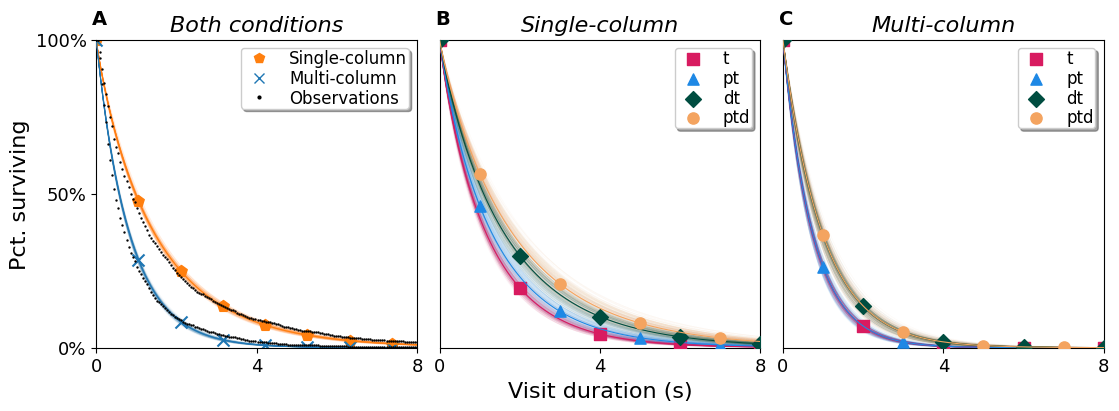

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13,4))

label_size = 14

"""
Plot empirical
"""

for condition in [1, 2]:
    data = pd.read_csv(os.path.join(module_path, FORMATTED_DIR, f'filter={FILTER}',f"weibull_data_{RADIUS}.csv"))
    data = data[data.x == condition]
    plot_empirical(axs[0], data)
    
"""
Plot models
"""
n_sample = 100

plot_separate(axs[0], fit_s, n_sample, survival_function, plot_title = False, sampling = True)
plot_separate(axs[0], fit_s, n_sample, survival_function, plot_title = False, sampling = False)
plot_separate_cov([axs[1], axs[2]], fit_sc, n_sample, survival_function, plot_title = False, sampling = True, plot_all=True)

plot_separate_cov([axs[1], axs[2]], fit_sc, n_sample, survival_function, plot_title = False, sampling = False, plot_all=True)

"""
Plot legend
"""

#ax.set_title("Separate", size = label_size, weight = "bold")
axs[1].set_xlabel("Visit duration (s)", size = 16)     

sc = Line2D([], [], color="tab:orange",markersize=7, label="Single-column",linestyle="", marker="p")
mc = Line2D([], [], color="tab:blue",markersize=7, label="Multi-column",linestyle="", marker="x")
circle = Line2D([], [], color='black', marker='.', linestyle='None', markersize=4, label='Observations')
#ppg = Line2D([], [], color='lightgrey',markersize=100, label='Other condition')
handles = [sc, mc, circle]
labels = [h.get_label() for h in handles] 
axs[0].legend(handles=handles, shadow=True, labels=labels, fontsize="large", loc = "upper right", ncol=1,frameon=True, labelspacing=0.1,borderpad=0.1) 
axs[0].set_title("Both conditions", size = 16, style="italic")
axs[1].set_title("Single-column", size = 16, style="italic")
axs[2].set_title("Multi-column", size = 16, style="italic")
axs[1].set_yticks([])
axs[2].set_yticks([])


for index, ax in enumerate(axs):
    ax.text(-0.1, 1.05, string.ascii_uppercase[index], size=14, weight="bold")
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)

plt.subplots_adjust(wspace=0.07)
plt.savefig(os.path.join(save_path, f'survival_function_both_models.pdf'), dpi=300, bbox_inches='tight')

# Hazard functions

Plot survival functions (Figure 4).

In [42]:
def hazard_function(alpha, sigma, X):
    
    try:
        # There are some divisions by zero errors, add a small number to avoid (seems to not affect the results)
        X[X==0] = 0.00000000001
    except:
        pass
    
    hazard = (alpha/sigma**alpha)*(X)**(alpha-1)
    
    return hazard

## Hazard functions with both models (posterior means)

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.16it/s]


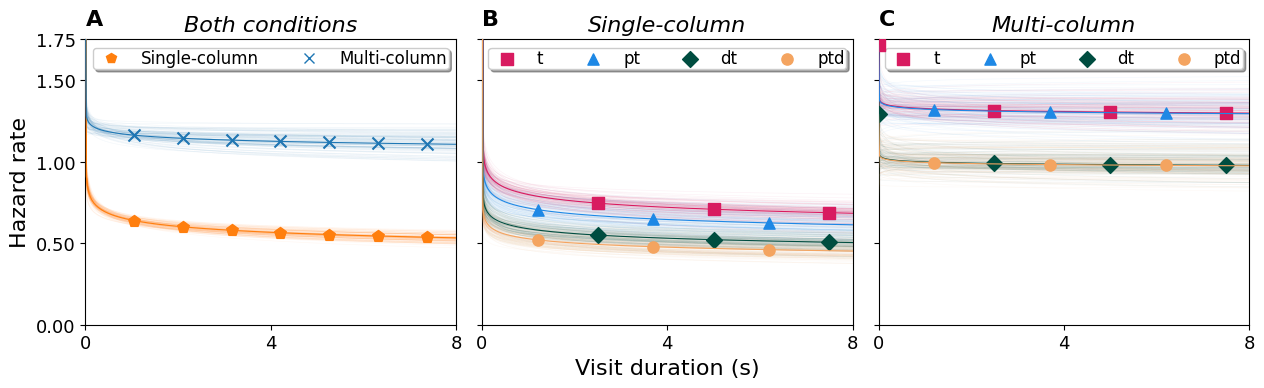

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(13,4), sharey=True)
    
"""
Plot models
"""
n_sample = 100

plot_separate(axs[0], fit_s, n_sample, hazard_function, sampling=True, plot_title=False)
plot_separate(axs[0], fit_s, n_sample, hazard_function, sampling=False, plot_title=False)
plot_separate_cov(axs, fit_sc, n_sample, hazard_function, sampling=True, plot_title=False)
plot_separate_cov(axs, fit_sc, n_sample, hazard_function, sampling=False, plot_title=False)

"""
Plot legend
"""
axs[1].set_xlabel("Visit duration (s)", size = 16)

for col in range(3):
    ax = axs[col]
    ax.text(0, 1.05, string.ascii_uppercase[col], transform=ax.transAxes, size=16, weight="bold")

axs[0].set_ylabel("Hazard rate", size = 16)
for ax in axs:
    if RADIUS != 48:
        ax.set_ylim(0,2.25)
    else:
        ax.set_ylim(0,1.75)
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)

sc = Line2D([], [], color="tab:orange",markersize=7, label="Single-column",linestyle="", marker="p")
mc = Line2D([], [], color="tab:blue",markersize=7, label="Multi-column",linestyle="", marker="x")
handles = [sc, mc]
labels = [h.get_label() for h in handles] 
axs[0].legend(handles=handles, shadow = True, labels=labels, fontsize="large", loc = "upper center", ncol=2,frameon=True, labelspacing=0.1,borderpad=0.1) 
axs[0].set_title("Both conditions", size = 16, style="italic")
axs[1].set_title("Single-column", size = 16, style="italic")
axs[2].set_title("Multi-column", size = 16, style="italic")

plt.tight_layout()
plt.subplots_adjust(wspace=0.07)
plt.savefig(os.path.join(save_path, f'hazard_function_both_models.pdf'), dpi=300, bbox_inches='tight')

# Proportion surviving

Analyse proportions surviving.

## Separate model

In [44]:
df = fit_s.to_frame() 

for indicator in [1,2]:
    proportions = []
    alphas = df[f'alpha.{indicator}']
    sigmas = df[f'sigma.{indicator}']

    X = 1
    
    survival_proportions = survival_function(alphas, sigmas, X)
    
    print (f"INDICATOR : {indicator}")
    print (f"max : {round(survival_proportions.min(),2)}")
    print (f"min : {round(survival_proportions.max(),2)}")

INDICATOR : 1
max : 0.47
min : 0.53
INDICATOR : 2
max : 0.28
min : 0.33


## Separate model with covariates

In [45]:
df = fit_sc.to_frame() 

for indicator in [1,2]:
    alphas = df[f'alpha.{indicator}']
    betas_0 = df[f'beta_0.{indicator}']
    betas_i = df[f'beta_i.{indicator}']
    betas_d = df[f'beta_d.{indicator}']
    
    X = 1
    
    
    for d,i in [[0,0], [0,1], [1,0], [1,1]]:
        sigmas = np.exp(-(betas_0 + betas_i*i + betas_d*d)/alphas)
        
        survival_proportions = survival_function(alphas, sigmas, X)

        print (f"CONDITION : {indicator}")
        print (f"d ={d}, i={i}")
        print (f"max : {round(survival_proportions.min(), 2)}")
        print (f"min : {round(survival_proportions.max(),2)}")

CONDITION : 1
d =0, i=0
max : 0.37
min : 0.47
CONDITION : 1
d =0, i=1
max : 0.41
min : 0.51
CONDITION : 1
d =1, i=0
max : 0.48
min : 0.58
CONDITION : 1
d =1, i=1
max : 0.52
min : 0.62
CONDITION : 2
d =0, i=0
max : 0.22
min : 0.3
CONDITION : 2
d =0, i=1
max : 0.23
min : 0.29
CONDITION : 2
d =1, i=0
max : 0.32
min : 0.41
CONDITION : 2
d =1, i=1
max : 0.32
min : 0.42
